In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | maniitsoq
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | tevriz
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | perpignan
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hobyo
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | bristol
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | haines junction
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | k

Processing Record 41 of Set 4 | chegutu
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | malinovka
Processing Record 44 of Set 4 | bytow
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | tidore
City not found. Skipping...
Processing Record 47 of Set 4 | jalu
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | nerchinskiy zavod
Processing Record 50 of Set 4 | san cristobal
Processing Record 1 of Set 5 | linjiang
Processing Record 2 of Set 5 | nanakuli
Processing Record 3 of Set 5 | khorramshahr
Processing Record 4 of Set 5 | bay roberts
Processing Record 5 of Set 5 | pangnirtung
Processing Record 6 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 7 of Set 5 | biak
Processing Record 8 of Set 5 | hobart
Processing Record 9 of Set 5 | cervo
Processing Record 10 of Set 5 | sardulgarh
Processing Record 11 of Set 5 | fortuna
Processing Record 12 of Set 5 | lompoc
Processing Record 13 of Set 5 | kahul

Processing Record 28 of Set 8 | ukrayinka
Processing Record 29 of Set 8 | kruisfontein
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | ryotsu
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | gilgit
Processing Record 34 of Set 8 | kismayo
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | makokou
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | baoqing
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | a coruna
Processing Record 41 of Set 8 | manyana
Processing Record 42 of Set 8 | halalo
City not found. Skipping...
Processing Record 43 of Set 8 | auki
Processing Record 44 of Set 8 | el alto
Processing Record 45 of Set 8 | torbay
Processing Record 46 of Set 8 | kaa-khem
Processing Record 47 of Set 8 | praia
Processing Record 48 of Set 8 | westport
Processing Record 49 of Set 8 | lata
Processing Record 50 of Set 8 | upernavik
Processing Record 1 of Set 9 | vestmannaeyjar

Processing Record 16 of Set 12 | kagoro
Processing Record 17 of Set 12 | puerto escondido
Processing Record 18 of Set 12 | bilma
Processing Record 19 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 20 of Set 12 | inhambane
Processing Record 21 of Set 12 | eydhafushi
Processing Record 22 of Set 12 | safwah
City not found. Skipping...
Processing Record 23 of Set 12 | shahrud
Processing Record 24 of Set 12 | tomatlan
Processing Record 25 of Set 12 | puro
Processing Record 26 of Set 12 | truro
Processing Record 27 of Set 12 | emba
Processing Record 28 of Set 12 | bada
Processing Record 29 of Set 12 | crab hill
City not found. Skipping...
Processing Record 30 of Set 12 | statesville
Processing Record 31 of Set 12 | kawalu
Processing Record 32 of Set 12 | matara
Processing Record 33 of Set 12 | walvis bay
Processing Record 34 of Set 12 | sainte-marie
Processing Record 35 of Set 12 | nizwa
Processing Record 36 of Set 12 | qasigiannguit
Processing Record 37 of Set 12 | sover

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,-11.45,93,10,6.33,GL,2022-04-15 03:09:57
1,Maniitsoq,65.4167,-52.9000,12.49,62,1,8.16,GL,2022-04-15 03:09:58
2,Luderitz,-26.6481,15.1594,58.60,76,34,23.51,NA,2022-04-15 03:09:58
3,Leningradskiy,69.3833,178.4167,17.89,91,100,12.50,RU,2022-04-15 03:09:58
4,Tevriz,57.5090,72.4042,48.83,80,68,3.31,RU,2022-04-15 03:09:59
5,Bredasdorp,-34.5322,20.0403,54.27,84,48,5.48,ZA,2022-04-15 03:08:10
6,Provideniya,64.3833,-173.3000,35.71,87,100,13.42,RU,2022-04-15 03:09:59
7,Atuona,-9.8000,-139.0333,79.34,73,47,13.89,PF,2022-04-15 03:09:59
8,Nanortalik,60.1432,-45.2371,30.61,92,100,5.50,GL,2022-04-15 03:10:00
9,Dunedin,-45.8742,170.5036,64.80,55,44,11.01,NZ,2022-04-15 03:10:00


In [11]:
#Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign df the new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2022-04-15 03:09:57,69.2167,-51.1000,-11.45,93,10,6.33
1,Maniitsoq,GL,2022-04-15 03:09:58,65.4167,-52.9000,12.49,62,1,8.16
2,Luderitz,NA,2022-04-15 03:09:58,-26.6481,15.1594,58.60,76,34,23.51
3,Leningradskiy,RU,2022-04-15 03:09:58,69.3833,178.4167,17.89,91,100,12.50
4,Tevriz,RU,2022-04-15 03:09:59,57.5090,72.4042,48.83,80,68,3.31
5,Bredasdorp,ZA,2022-04-15 03:08:10,-34.5322,20.0403,54.27,84,48,5.48
6,Provideniya,RU,2022-04-15 03:09:59,64.3833,-173.3000,35.71,87,100,13.42
7,Atuona,PF,2022-04-15 03:09:59,-9.8000,-139.0333,79.34,73,47,13.89
8,Nanortalik,GL,2022-04-15 03:10:00,60.1432,-45.2371,30.61,92,100,5.50
9,Dunedin,NZ,2022-04-15 03:10:00,-45.8742,170.5036,64.80,55,44,11.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

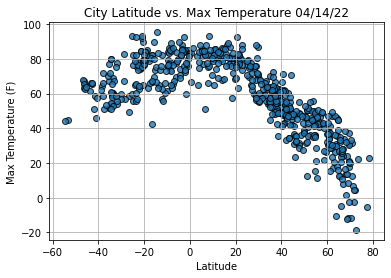

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

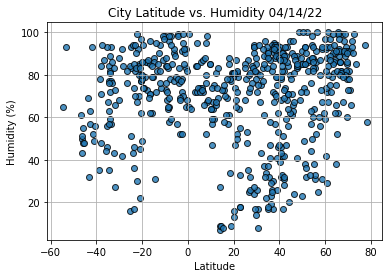

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

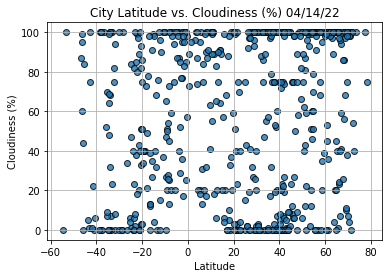

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

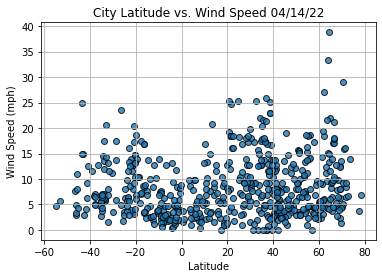

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        PT
Date          2022-04-15 03:10:02
Lat                       32.6667
Lng                         -17.1
Max Temp                     66.0
Humidity                       83
Cloudiness                     86
Wind Speed                   5.19
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
567     True
568     True
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2022-04-15 03:09:57,69.2167,-51.1000,-11.45,93,10,6.33
1,Maniitsoq,GL,2022-04-15 03:09:58,65.4167,-52.9000,12.49,62,1,8.16
3,Leningradskiy,RU,2022-04-15 03:09:58,69.3833,178.4167,17.89,91,100,12.50
4,Tevriz,RU,2022-04-15 03:09:59,57.5090,72.4042,48.83,80,68,3.31
6,Provideniya,RU,2022-04-15 03:09:59,64.3833,-173.3000,35.71,87,100,13.42


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

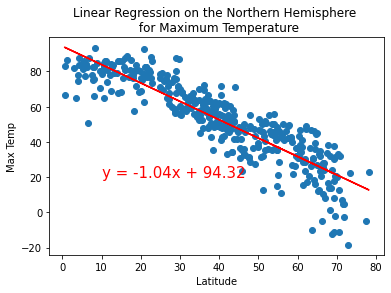

<Figure size 432x288 with 0 Axes>

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

# Save the figure.
plt.savefig("weather_data/Fig5.png")

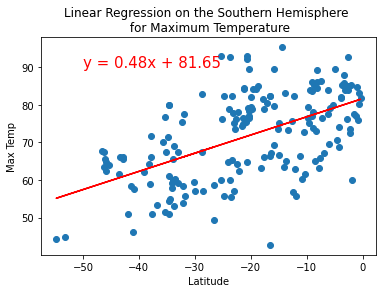

<Figure size 432x288 with 0 Axes>

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

plt.savefig('weather_data/Fig6.png')

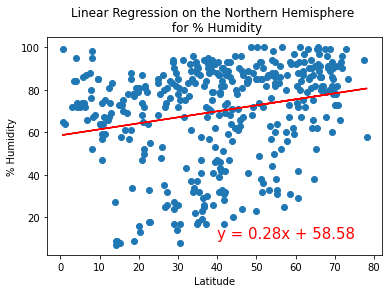

<Figure size 432x288 with 0 Axes>

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

plt.savefig('weather_data/Fig7.png')

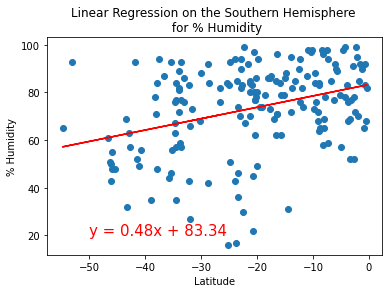

<Figure size 432x288 with 0 Axes>

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

plt.savefig('weather_data/Fig8.png')

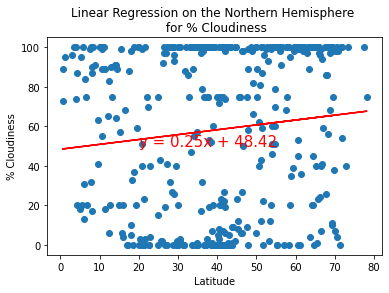

<Figure size 432x288 with 0 Axes>

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,50))

plt.savefig('weather_data/Fig9.png')

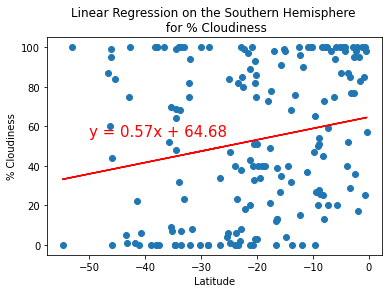

<Figure size 432x288 with 0 Axes>

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,55))

plt.savefig('weather_data/Fig10.png')

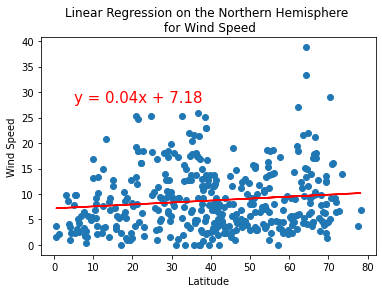

<Figure size 432x288 with 0 Axes>

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,28))

plt.savefig('weather_data/Fig11.png')

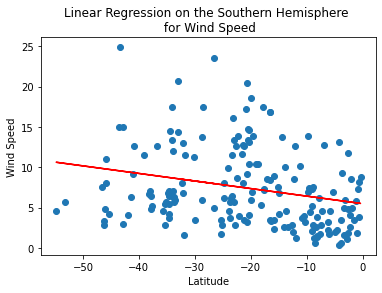

<Figure size 432x288 with 0 Axes>

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,34))

plt.savefig('weather_data/Fig12.png')